# Actividad 2_10: Repaso

En esta Actividad vamos a repasar los conceptos que hemos visto hasta ahora en clase.

Descarga el archivo "Top 100 Cryptocurrency 2022.csv" que se adjunta con la tarea y realiza los siguientes apartados:

Debes escribir una programa que realice las siguientes tareas:

1. Importar los datos del dataset adjunto con la tarea y guardarlos en un DataFrame.
2. Crea una función que reciba un número (debes tratar la excepción en caso de que no sea un entero) y el dataframe y devuelva un DataFrame en el que haya eliminado todas las criptomonedas que no superen el número pasado como parámetro. Prueba la función.
3. Normaliza la columna del precio actual de las criptomonedas ("Price") y muestre una gráfica con los valores de las 10 que tienen mayor valor.
4. Predice el próximo valor de las criptomonedas suponiendo que la variación de las próximas 24h  va a ser la misma que en las anteriores ('Changes 24H') y mételo en una columna nueva.

        Precio
1  1465.831898
0  1464.406296
2  1462.782695
3    99.274131
4    98.640531
5    78.642511
6    14.522127
7    10.993763
8     6.059598
9     5.513118


,Crypto Name,Precio,Cambios 24H
0,BITCOIN,1464.406296,-2.97
1,WRAPPED BITCOIN,1465.831898,-2.84
2,HUOBI BTC,1462.782695,-4.24
3,ETHEREUM,99.274131,-3.64
4,LIDO STAKED ETHER,98.640531,-3.23


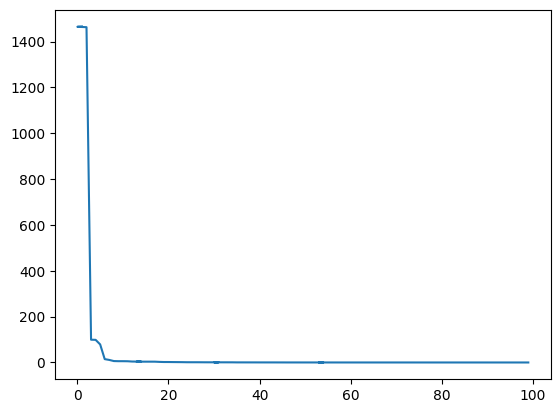

In [ ]:
import pandas as pd
from sklearn.preprocessing import *
import matplotlib.pyplot as plt

# Cargar dataframe
df_cripto = pd.read_csv("Top 100 Cryptocurrency 2022.csv")

# Crear funcion la cual reciba un número entero
precios = []
limite_mercado = []
crypto = []
cambios_24h = []

# Función que limpia
def limpiados(n):
    if type(n) == float:
        for row in df_cripto.iterrows():
            crypto = df_cripto["Crypto Name"]
            precios = df_cripto["Price"].str.replace("$", "").str.replace(",", "").str.replace("\"", "").astype(float)
            #precios = df_cripto["Price"].str.replace(r'[\$,"]', '', regex=True).astype(float)
            cambios_24h = df_cripto["Changes 24H "].str.replace("%", "").str.replace("$", "").astype(float) 

        df_limpio = pd.DataFrame({"Crypto Name": crypto, "Precio": precios, "Cambios 24H" : cambios_24h})

        # Normalizar datos del precio actual "Price"
        escalador = RobustScaler()
        df_limpio[["Precio"]] = escalador.fit_transform(df_limpio[["Precio"]])
        top10 = df_limpio[["Precio"]].sort_values(by="Precio", ascending=False)
        print(top10.head(10))

        # Mostrar datos del top 10 mejores precios
        plt.plot(top10)

        # Predice el precio de las criptomonedas al día siguiente
        return df_limpio.head()
    else:
        print("Mete un número decimal")

limpiados(3.5)